# Agenda
- Handling Imbalanced Data in Classification
  - Introduction to Imbalanced Data
  - Oversampling Technique - (SMOTE)
  - Undersampling Technique - (RandomUnderSampler)
  - Ensembling Methods for Imbalanced Data

## Handling Imbalanced Data in Classification
The problem with imabalanced data is that models tend to favor the majority class, leading to a poor performance in identifying the minority class. In Such cases model prioritize overall accuracy instead of recognizing the minority class

### Introduction to Imbalanced Data

Imbalanced data refers to a situation where the classes are not represented equally. This typically happens in classification where, one class(Majority Class) significantly outnumbers the other class or classes(Minority Class)
- **Balanced Dataset** - A balanced dataset has an equal or near equal representation on all classes.
  example- class distribution: Healthy: 51.9%, Diseased :48.1%
- **Imbalanced Dataset** - A imbalanced dataset has significant difference in the representation of class, with one class being much more prevalent than others.
  example- class distribution: Healthy: 99%, Diseased :1%

**Before getting into techniques to handle imbalanced data, let us us understand how to determine if your data is imbalanced or not** 

**About the Dataset:**

The datasets contains transactions made by credit cards in September 2013 by European cardholders.

 It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, original features and more background information about the data is not available.

 Features `V1, V2, ... V28` are the principal components obtained with PCA, the only features which have not been transformed with PCA are `Time` and `Amount`.

 Feature `Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.

 The feature `Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.

 Feature `Class` is the response/target variable and it takes value 1 in case of fraud and 0 otherwise.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df =  pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,89630.0,0.030601,0.859108,0.290804,-0.591915,0.441892,-1.033405,1.016281,-0.190080,-0.066897,...,-0.251454,-0.537176,0.081516,-0.016869,-0.498699,0.142886,0.250215,0.097351,5.99,0
1,33404.0,1.042874,0.348936,-0.207597,2.215841,0.991928,1.349503,0.100767,0.451493,-0.739607,...,0.064860,0.193583,-0.007651,-1.379281,0.389286,0.225199,0.015614,-0.010651,15.16,0
2,57910.0,-1.549217,0.444995,1.953795,0.767481,1.249854,-0.439201,0.843048,0.145210,-1.561334,...,0.226098,0.136749,-0.178771,-0.013354,0.782533,-0.175391,-0.075909,0.058072,73.02,0
3,133413.0,-0.322340,0.969558,0.462259,-0.100560,-0.187871,-1.069206,0.454631,0.211302,-0.162835,...,0.164689,0.497732,-0.038204,0.420742,-0.191605,-0.333414,-0.032846,-0.010004,9.94,0
4,171524.0,1.990957,-1.984952,-1.014321,-1.265569,-1.371786,0.034195,-1.117904,0.061933,-0.828024,...,-0.416109,-0.844353,0.244993,0.716250,-0.264875,-0.387468,-0.015237,-0.036681,137.94,0


In [4]:
print(f'Total Observations are {df.shape[0]}')

Total Observations are 2000


In [5]:
class_dist = df.Class.value_counts()
print(f'Class Distribution for the Target Variable \n {class_dist}')

Class Distribution for the Target Variable 
 Class
0    1974
1      26
Name: count, dtype: int64


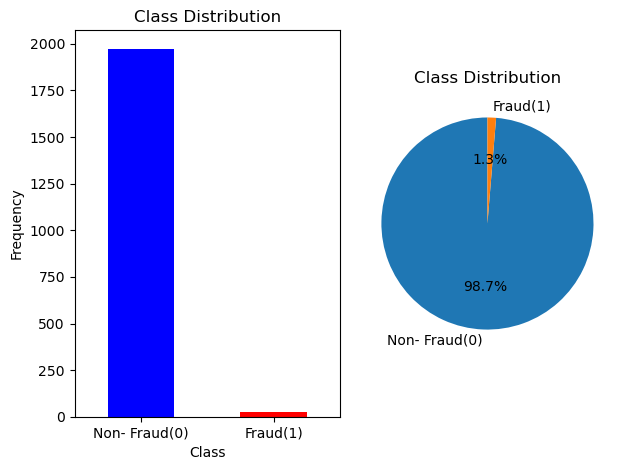

In [11]:
# Plot the Distribution of Class

plt.subplot(1,2,1)
class_dist.plot(kind='bar', color = ['blue', 'red'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0,1], ['Non- Fraud(0)', 'Fraud(1)'], rotation = 0)

plt.subplot(1,2,2)
class_dist.plot(kind='pie', color = ['blue', 'red'], labels =   ['Non- Fraud(0)', 'Fraud(1)'], 
                autopct = '%1.1f%%', startangle = 90)
plt.title('Class Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()


### Techniques to handle Imbalanced data
- OverSampling Technique
  - Ideal when the minority class is severely underrepresented
- Undersampling Technique
  - Useful when the dataset is large enough ,  and removing instances won't result in significant information loss
- Ensemble Methods
  - effective when leveraging an ensemble approach to maintain robustness and generalizability while addressing class imbalance

## OverSampling Technique
Oversampling is a techniques used to balance the class distribution by increasing the number of minority class samples. This can be done by duplicating existing samples or *creating synthetic samples*

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/oversampling.png)

## SMOTE (Synthetic Minority Oversampling TEchnique)
it is a more advanced method that generates new synthetic samples for the minority class. it works by:
- selecting a random minority class sample
- find its k nearest neighbor(usually = 5)
- Choosing one of these neighbors and creating a synthetic sample along the line segment joining the original sample and the chosen neighbor.
  
#### Advantges
- prevents overfitting which may occur in case of simple duplication of minority class.

In [13]:
# Let's Implement SMOTE on credit card data. 
# we need a library called imblearn in order to implement the imbalanced data techniques in sci-kit learn way.
#!pip install imblearn

In [14]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [83]:
# Seperate Feature and Target
X =  df.drop(columns = ['Class'])
y =  df['Class']

# Split the data into train test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.4, random_state = 25)

In [84]:
# Standardize the data

scaler =  StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

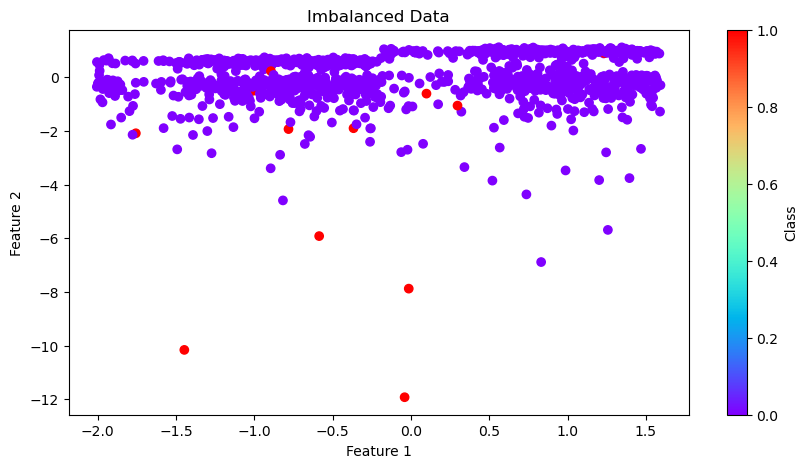

In [85]:
# scatter plot for imbalanced data
plt.figure(figsize = (10,5))
plt.scatter(X_train_sc[:, 0], X_train_sc[:,1], c= y_train, cmap = 'rainbow')
plt.title('Imbalanced Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label ='Class')

plt.show()

In [86]:
X_train_sc.shape

(1200, 30)

In [87]:
# Apply SMOTE to oversample the data

smote = SMOTE(random_state = 25)
X_train_smote, y_train_smote = smote.fit_resample(X_train_sc, y_train)

In [88]:
X_train_smote.shape

(2376, 30)

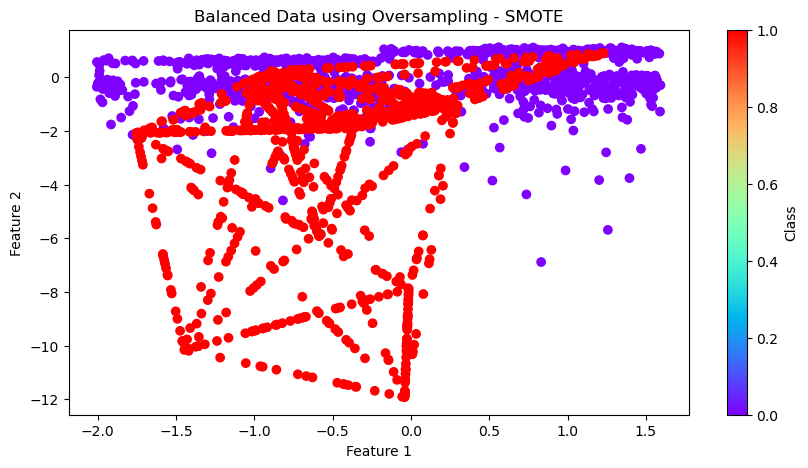

In [89]:
# Plot The balanced Data


plt.figure(figsize = (10,5))
plt.scatter(X_train_smote[:, 0], X_train_smote[:,1], c= y_train_smote, cmap = 'rainbow')
plt.title('Balanced Data using Oversampling - SMOTE')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label ='Class')

plt.show()

In [90]:
# Train and Evaluate the Decision Tree Classifier

In [91]:
dtc =  DecisionTreeClassifier(max_depth = 3, random_state = 25)
dtc.fit(X_train_smote, y_train_smote)

# Predictions
y_train_pred =  dtc.predict(X_train_smote)
train_accuracy = accuracy_score(y_train_smote, y_train_pred)
print(f'Train Accuracy {train_accuracy:.3f}')
y_test_pred =  dtc.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy {test_accuracy:.3f}')

Train Accuracy 0.998
Test Accuracy 0.986


In [92]:
# Classification Report

print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       786
           1       0.60      0.64      0.62        14

    accuracy                           0.99       800
   macro avg       0.80      0.82      0.81       800
weighted avg       0.99      0.99      0.99       800



In [93]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

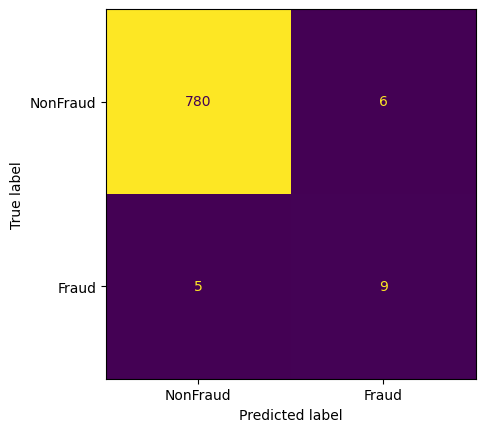

In [94]:
conf_mat = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels = ['NonFraud', 'Fraud'])
cm_display.plot(colorbar = False)
plt.show()

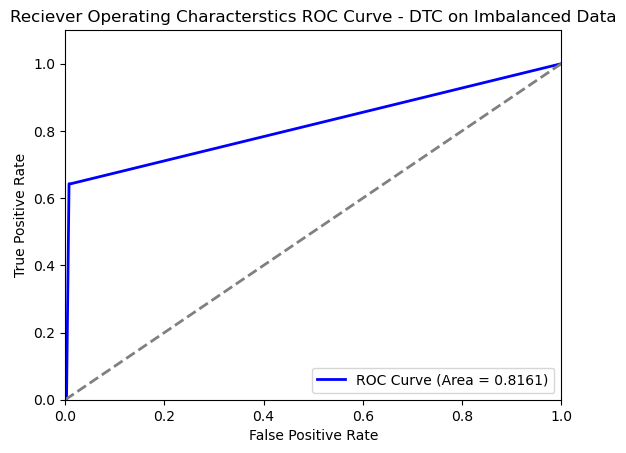

In [95]:
# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test_sc)[:,1])
#compute AUC
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test_sc)[:,1])


plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')

plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - DTC on Imbalanced Data')
plt.legend(loc = 'lower right')
plt.show()

# Undersampling Techniques
Undersampling is opposite to oversampling. it involves reducing the number of majority class to balance the dataset. This can be done by randomly removing samples from the majority class

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ML/Lesson04_Regression/updates/undersampling.png)

In [96]:
# Let's Implement UnderSampling on credit card data. 

In [97]:
from imblearn.under_sampling import RandomUnderSampler

In [98]:
undersampler = RandomUnderSampler(random_state = 25)
X_train_undersampled, y_train_undersampled = undersampler.fit_resample(X_train_sc, y_train)

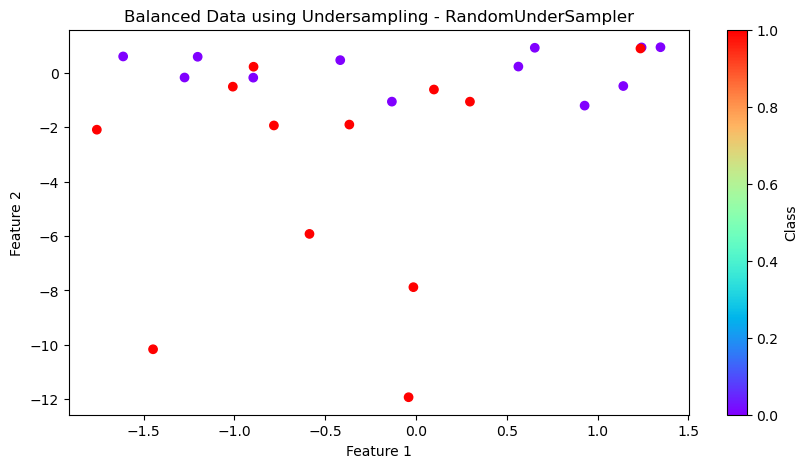

In [99]:
# Plot The balanced Data


plt.figure(figsize = (10,5))
plt.scatter(X_train_undersampled[:, 0], X_train_undersampled[:,1], c= y_train_undersampled, cmap = 'rainbow')
plt.title('Balanced Data using Undersampling - RandomUnderSampler')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label ='Class')

plt.show()

Train Accuracy 1.000
Test Accuracy 0.968
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       786
           1       0.33      0.86      0.48        14

    accuracy                           0.97       800
   macro avg       0.67      0.91      0.73       800
weighted avg       0.99      0.97      0.97       800



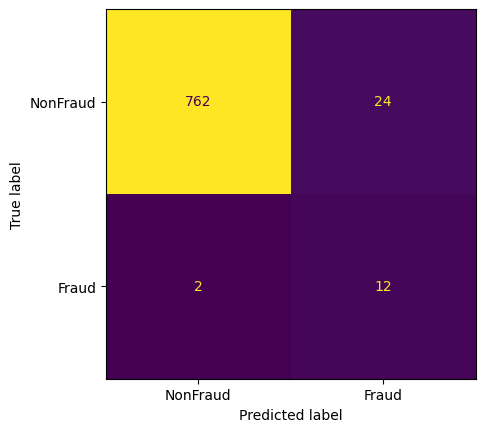

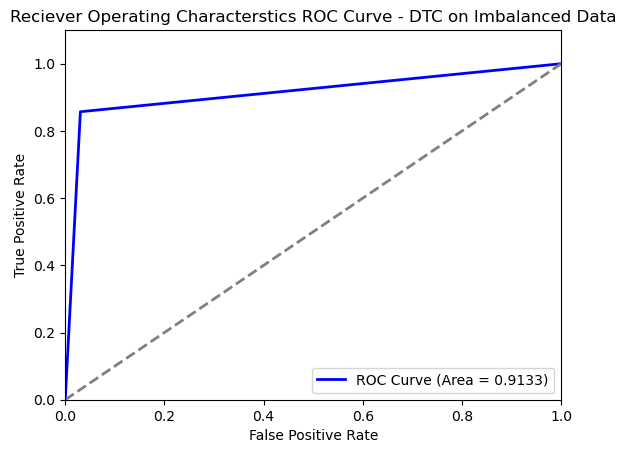

In [100]:
dtc =  DecisionTreeClassifier(max_depth = 3, random_state = 25)
dtc.fit(X_train_undersampled, y_train_undersampled)

# Predictions
y_train_pred =  dtc.predict(X_train_undersampled)
train_accuracy = accuracy_score(y_train_undersampled, y_train_pred)
print(f'Train Accuracy {train_accuracy:.3f}')
y_test_pred =  dtc.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy {test_accuracy:.3f}')


print(classification_report(y_test, y_test_pred))
conf_mat = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels = ['NonFraud', 'Fraud'])
cm_display.plot(colorbar = False)
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, dtc.predict_proba(X_test_sc)[:,1])
#compute AUC
roc_auc = roc_auc_score(y_test, dtc.predict_proba(X_test_sc)[:,1])


plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')

plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - DTC on Imbalanced Data')
plt.legend(loc = 'lower right')
plt.show()

In [101]:
# Implementing pipeline like sklearn. 
# Imblearn has specifically designed pipelines to handle imbalanced data by integrating fit_resample methods.

In [102]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold

In [103]:
# Create the pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sampler', RandomUnderSampler(random_state = 25)),
    ('classfier', DecisionTreeClassifier(random_state = 25))
    
])

cv =  StratifiedKFold(n_splits = 5, shuffle = True, random_state = 25)

cv_scores = cross_val_score(pipeline, X, y, cv = cv, scoring ='accuracy')

print(f'Mean Cross Validation Accuracy {cv_scores.mean():.4f}')

Mean Cross Validation Accuracy 0.9065


**Note:**

 In situations where the dataset is highly imbalanced, the ROC curve can give an overly optimistic assessment of the model’s performance.

This optimism bias arises because the ROC curve’s false positive rate (FPR) can become very small when the number of actual negatives is large. As a result, even a large number of false positives would only lead to a small FPR, leading to a potentially high AUC that doesn’t reflect the practical reality of using the model.

Then comes **Precision-Recall Curve and AUCPR** which is especially useful when the positive class is rarer and more relevant.

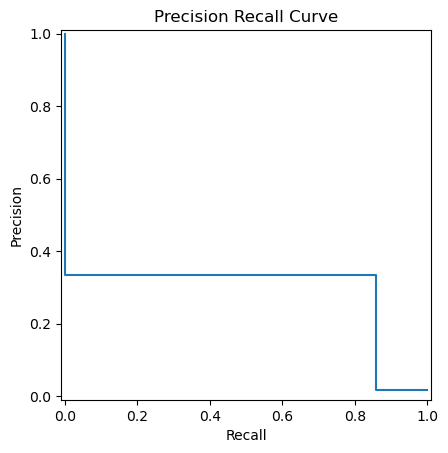

Area Under Precision Recall Curve (AUCPR)  0.2882


In [104]:
# Plot Precision Recall Curve

from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay

# Plot Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, dtc.predict_proba(X_test_sc)[:,1])

disp =  PrecisionRecallDisplay(precision = precision, recall =  recall)
disp.plot()
plt.title('Precision Recall Curve')
plt.show()

aucpr = average_precision_score(y_test, dtc.predict_proba(X_test_sc)[:,1])
print(f'Area Under Precision Recall Curve (AUCPR) {aucpr: .4f}')

- The curve starts with a high precision value of 1.0 when recall is near zero. This indicates that at the very low threshold settings, where the model predicts only the most confidently positive samples as positive, it does so correctly.

- As recall increases slightly, the precision drops sharply to a low value (close to 0.2) and remains nearly constant across the rest of the recall range. This is a characteristic of a model that, after a certain point, begins to classify more and more negative samples as positive, thus drastically reducing precision.

The nearly flat and low precision across most of the recall range suggests that the model struggles to discriminate between positive and negative classes effectively as it attempts to increase recall

In [105]:
precision

array([0.0175    , 0.33333333, 1.        ])

In [106]:
recall

array([1.        , 0.85714286, 0.        ])

## Ensemble Method for imbalanced Data

Ensemble methods combine multiple models to improve performance. for imbalanced data `imblearn` provides an ensemble method  `BalancedRandomForestClassifier`.  `BalancedRandomForestClassifier` will do randomundersampling and apply randomforest model to the modified data

In [107]:
# Implementing Balanced Random Forest

In [108]:
from imblearn.ensemble import BalancedRandomForestClassifier

In [110]:
brf_classifier = BalancedRandomForestClassifier(random_state = 25, sampling_strategy ='all', replacement = True, bootstrap = False )
brf_classifier.fit(X_train_sc, y_train)

BalancedRandomForestClassifier(bootstrap=False, random_state=25,
                               replacement=True, sampling_strategy='all')

Train Accuracy 0.997
Test Accuracy 0.993
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       786
           1       0.79      0.79      0.79        14

    accuracy                           0.99       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.99      0.99      0.99       800



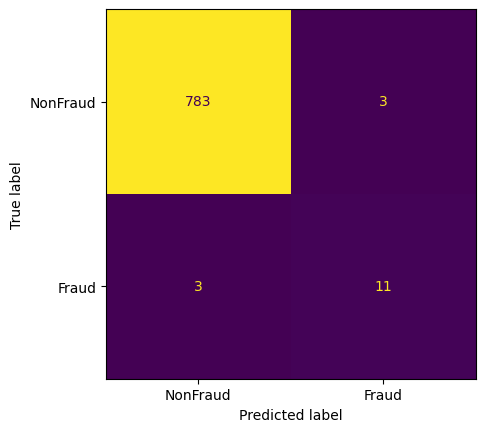

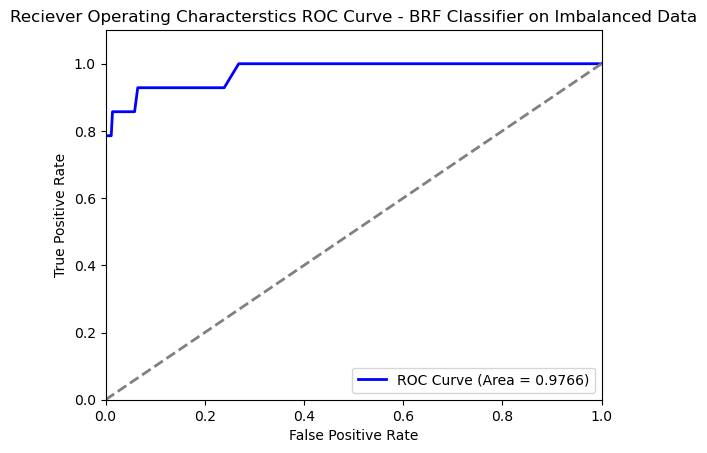

In [111]:
# Predictions
y_train_pred =  brf_classifier.predict(X_train_sc)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f'Train Accuracy {train_accuracy:.3f}')

y_test_pred =  brf_classifier.predict(X_test_sc)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy {test_accuracy:.3f}')


print(classification_report(y_test, y_test_pred))
conf_mat = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(conf_mat, display_labels = ['NonFraud', 'Fraud'])
cm_display.plot(colorbar = False)
plt.show()

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, brf_classifier.predict_proba(X_test_sc)[:,1])
#compute AUC
roc_auc = roc_auc_score(y_test, brf_classifier.predict_proba(X_test_sc)[:,1])


plt.plot(fpr, tpr, color = 'blue', lw =2, label = f'ROC Curve (Area = {roc_auc:.4f})')

plt.plot([0,1], [0,1], color = 'grey', lw =2, linestyle ='dashed')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characterstics ROC Curve - BRF Classifier on Imbalanced Data')
plt.legend(loc = 'lower right')
plt.show()

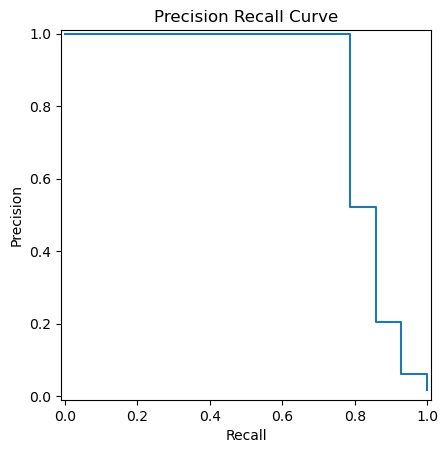

Area Under Precision Recall Curve (AUCPR)  0.2882


In [112]:
# Plot Precision Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, brf_classifier.predict_proba(X_test_sc)[:,1])

disp =  PrecisionRecallDisplay(precision = precision, recall =  recall)
disp.plot()
plt.title('Precision Recall Curve')
plt.show()

aucpr = average_precision_score(y_test, dtc.predict_proba(X_test_sc)[:,1])
print(f'Area Under Precision Recall Curve (AUCPR) {aucpr: .4f}')